# 함수형 모델 (다대다)
* 2개 이상의 컬럼이 입력되는 경우 

## 0 사용할 패키지 불러오기 

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import random

from sklearn.model_selection import train_test_split  # 데이터 분리를 위해 사용 

## 1. 데이터셋 생성하기
* 2행 100 열로 된 데이터 --> 100행에 2열 데이터로 변환 
* 학습 데이터 
* __검증 데이터__
* 테스트 데이터
* 사이킷 런에 잘 구현된 __train_test_split 함수__ 를 이용해서 데이터를 효율적으로 잘라냄 
    - test_size=0.4 : 테스트 사이즈가 40%라는 의미 (train : 60%, test : 40%)
    - suffle : 데이터를 섞을 것인지 선택 - 일반적으로 shuffule을 사용하면 결과가 더 좋음 
* train : val : test - 6:2:2 로 설정  

In [6]:
x = np.array([range(100), range(301, 401)])
y = np.array([range(100), range(301, 401)])

x = np.transpose(x)
y = np.transpose(y)

print(x.shape)

# 학습 데이터와 테스트 데이터 분리하기 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=66, test_size=0.4, shuffle=False)

# 검증 데이터와 테스트 데이터 분리하기 
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=66, test_size=0.5)

(100, 2)


## 2. 모델 구성하기
* Dense 레이어가 두 개인 다층퍼셉트론 모델. 
* 첫 번째 레이어는 5개의 뉴런을 가진 Dense 레이어
    - 오류역전파가 용이한 relu 활성화 함수를 사용.
* 두 번째 레이어는 3개의 뉴런을 가진 Dense 레이어 
* 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수는 relu를 사용

In [7]:
model = Sequential()

model.add(Dense(5, input_shape = (2, ), activation ='relu'))
model.add(Dense(3))
model.add(Dense(4))
model.add(Dense(2))  # 출력 2 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정하기
#### 모델 컴파일
* 모델을 실행시키지 전에 머신이 이해할 수 있도록 컴파일 시킴
* loss : 손실 마수는 어떤 것을 사용할 것인가? --> mse
* optimizer : 최적화 함수는? --> adam, rmsprop
* metrics : 어떤 방식? --> accuracy, mse(mean squared error) 적용 

In [8]:
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

## 4. 모델 학습시키기
* epochs : 훈련 횟수
* batch_size : 몇 개씩 끊어서 작업을 할 것인가를 의미 
    - batch_size를 크게 잡을 경우 속도가 빨라지지만 정확도가 떨어짐
    - 작게 잡을 경우 속도는 떨어지지만 정확도는 올라감
* valication_data : 검증 데이터 

In [9]:
hist = model.fit(x_train, y_train, epochs=300, batch_size=1,validation_data = (x_val, y_val))

Train on 60 samples, validate on 20 samples
Epoch 1/300
60/60 [==============================] - 1s 10ms/sample - loss: 68173.3283 - mse: 68173.3281 - val_loss: 72875.3086 - val_mse: 72875.3047
Epoch 2/300
60/60 [==============================] - 0s 2ms/sample - loss: 48525.6951 - mse: 48525.6914 - val_loss: 44704.7803 - val_mse: 44704.7852
Epoch 3/300
60/60 [==============================] - 0s 2ms/sample - loss: 25968.5658 - mse: 25968.5625 - val_loss: 13657.2243 - val_mse: 13657.2246
Epoch 4/300
60/60 [==============================] - 0s 2ms/sample - loss: 6131.6491 - mse: 6131.6475 - val_loss: 621.0832 - val_mse: 621.0831
Epoch 5/300
60/60 [==============================] - 0s 2ms/sample - loss: 413.1174 - mse: 413.1174 - val_loss: 1633.9719 - val_mse: 1633.9719
Epoch 6/300
60/60 [==============================] - 0s 2ms/sample - loss: 197.8777 - mse: 197.8778 - val_loss: 1548.7928 - val_mse: 1548.7928
Epoch 7/300
60/60 [==============================] - 0s 2ms/sample - loss: 195.

60/60 [==============================] - 0s 2ms/sample - loss: 39.7173 - mse: 39.7173 - val_loss: 277.6381 - val_mse: 277.6381
Epoch 59/300
60/60 [==============================] - 0s 2ms/sample - loss: 36.5572 - mse: 36.5572 - val_loss: 345.9964 - val_mse: 345.9964
Epoch 60/300
60/60 [==============================] - 0s 2ms/sample - loss: 36.9708 - mse: 36.9708 - val_loss: 174.7135 - val_mse: 174.7135
Epoch 61/300
60/60 [==============================] - 0s 2ms/sample - loss: 33.0412 - mse: 33.0412 - val_loss: 246.7397 - val_mse: 246.7397
Epoch 62/300
60/60 [==============================] - 0s 2ms/sample - loss: 32.6189 - mse: 32.6189 - val_loss: 266.4210 - val_mse: 266.4210
Epoch 63/300
60/60 [==============================] - 0s 2ms/sample - loss: 27.4301 - mse: 27.4301 - val_loss: 138.1015 - val_mse: 138.1015
Epoch 64/300
60/60 [==============================] - 0s 2ms/sample - loss: 27.5184 - mse: 27.5184 - val_loss: 190.5909 - val_mse: 190.5909
Epoch 65/300
60/60 [=============

60/60 [==============================] - 0s 2ms/sample - loss: 1.9148e-08 - mse: 1.9148e-08 - val_loss: 2.9615e-08 - val_mse: 2.9615e-08
Epoch 117/300
60/60 [==============================] - 0s 2ms/sample - loss: 5.7390e-09 - mse: 5.7390e-09 - val_loss: 2.1661e-08 - val_mse: 2.1661e-08
Epoch 118/300
60/60 [==============================] - 0s 2ms/sample - loss: 3.8725e-09 - mse: 3.8725e-09 - val_loss: 4.2419e-08 - val_mse: 4.2419e-08
Epoch 119/300
60/60 [==============================] - 0s 2ms/sample - loss: 3.1945e-09 - mse: 3.1945e-09 - val_loss: 5.8950e-09 - val_mse: 5.8950e-09
Epoch 120/300
60/60 [==============================] - 0s 2ms/sample - loss: 4.7792e-09 - mse: 4.7792e-09 - val_loss: 1.1456e-08 - val_mse: 1.1456e-08
Epoch 121/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.7024e-09 - mse: 1.7024e-09 - val_loss: 1.1801e-08 - val_mse: 1.1801e-08
Epoch 122/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.5973e-09 - mse: 1.5973e-09 - 

60/60 [==============================] - 0s 2ms/sample - loss: 6.4688e-10 - mse: 6.4688e-10 - val_loss: 6.4541e-09 - val_mse: 6.4541e-09
Epoch 171/300
60/60 [==============================] - 0s 2ms/sample - loss: 9.3924e-10 - mse: 9.3924e-10 - val_loss: 2.7332e-09 - val_mse: 2.7332e-09
Epoch 172/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.0702e-09 - mse: 1.0702e-09 - val_loss: 1.2609e-09 - val_mse: 1.2609e-09
Epoch 173/300
60/60 [==============================] - 0s 2ms/sample - loss: 6.0701e-10 - mse: 6.0701e-10 - val_loss: 1.5374e-09 - val_mse: 1.5374e-09
Epoch 174/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.1571e-09 - mse: 1.1571e-09 - val_loss: 8.4583e-10 - val_mse: 8.4583e-10
Epoch 175/300
60/60 [==============================] - 0s 2ms/sample - loss: 8.9343e-10 - mse: 8.9343e-10 - val_loss: 5.4933e-10 - val_mse: 5.4933e-10
Epoch 176/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.0148e-09 - mse: 1.0148e-09 - 

Epoch 225/300
60/60 [==============================] - 0s 2ms/sample - loss: 3.0231e-07 - mse: 3.0231e-07 - val_loss: 2.7716e-08 - val_mse: 2.7716e-08
Epoch 226/300
60/60 [==============================] - 0s 2ms/sample - loss: 5.4878e-08 - mse: 5.4878e-08 - val_loss: 2.9810e-09 - val_mse: 2.9810e-09
Epoch 227/300
60/60 [==============================] - 0s 2ms/sample - loss: 7.0286e-08 - mse: 7.0286e-08 - val_loss: 9.3984e-08 - val_mse: 9.3984e-08
Epoch 228/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.0125e-06 - mse: 1.0125e-06 - val_loss: 1.2189e-07 - val_mse: 1.2189e-07
Epoch 229/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.8093e-06 - mse: 1.8093e-06 - val_loss: 2.3423e-06 - val_mse: 2.3423e-06
Epoch 230/300
60/60 [==============================] - 0s 2ms/sample - loss: 2.8837e-06 - mse: 2.8837e-06 - val_loss: 7.6646e-06 - val_mse: 7.6646e-06
Epoch 231/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.1257e-05 - mse:

60/60 [==============================] - 0s 2ms/sample - loss: 2.9283e-07 - mse: 2.9283e-07 - val_loss: 4.4654e-07 - val_mse: 4.4654e-07
Epoch 282/300
60/60 [==============================] - 0s 2ms/sample - loss: 7.7555e-07 - mse: 7.7555e-07 - val_loss: 2.9080e-06 - val_mse: 2.9080e-06
Epoch 283/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.7649e-04 - mse: 1.7649e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 284/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0724 - val_mse: 0.0724
Epoch 285/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0077 - mse: 0.0077 - val_loss: 4.8345e-04 - val_mse: 4.8345e-04
Epoch 286/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.1020 - mse: 0.1020 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 287/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 288/300
60/60 [

## 5. 학습과정 살펴보기

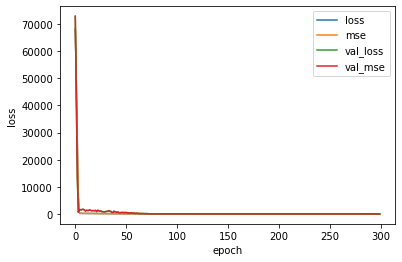

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_mse'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse', 'val_loss', 'val_mse'], loc='upper right')
plt.show()

## 6. 모델 평가하기

In [11]:
loss, mse = model.evaluate(x_test, y_test, batch_size =1)
print("loss : ", loss)
print("mse : ", mse )

20/20 [==============================] - 0s 2ms/sample - loss: 3.0976e-07 - mse: 3.0976e-07
loss :  3.097564331255853e-07
mse :  3.0975644e-07


## 7. 예측하기 

In [23]:
y_predict = model.predict(x_test)
print("결과물 : \n", y_predict)

(20, 2)
결과물 : 
 [[ 64.000885 365.00043 ]
 [ 79.000656 380.0004  ]
 [ 90.00047  391.00043 ]
 [ 65.00088  366.00043 ]
 [ 61.00094  362.00043 ]
 [ 95.000404 396.0004  ]
 [ 63.00092  364.00043 ]
 [ 88.00052  389.0004  ]
 [ 91.000465 392.00043 ]
 [ 99.00033  400.0004  ]
 [ 92.00042  393.00043 ]
 [ 85.00054  386.00043 ]
 [ 84.000565 385.00043 ]
 [ 77.00068  378.0004  ]
 [ 69.000824 370.00043 ]
 [ 74.00073  375.00043 ]
 [ 68.000824 369.00043 ]
 [ 72.00074  373.00043 ]
 [ 83.000595 384.00043 ]
 [ 96.00035  397.00043 ]]


#### RMSE 구하기
* __평균 제곱근 오차 - RMSE(Root Mean Squared Error)__ 
    - 회귀 분석을 평가할 때 가장 많이 사용하는 지표 중에 하나
    - MSE에 루트를 사용
    - 원래 데이터에서 평균을 뺀 값을 제곱하여 모두 더한 뒤 전체 개수로 나눈 값에 루트를 씌운 것
    - RMSE는 낮을수록 정밀도가 높음

In [13]:
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE : ", RMSE(y_test, y_predict))

RMSE :  0.0005564089369248688


#### R2 구하기
* __결정 계수(R2)__
    - 회귀 분석에서 많이 사용하는 지표 중에 하나
    - RMSE와 반대로 높을수록 좋은 지표
    - 0~1사이의 수치 - 0.73 정도의 값이 나오면 73%의 설명력을 가진다고 해석 
    - 사이킷런에서 r2_score 함수로 제공 
    - 만약 R2의 값이 음수가 나오면 학습 시 머신에 뭔가 잘못된 부분이 존재한다는 의미 

In [14]:
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print("R2 : ", r2_y_predict)

R2 :  0.9999999978087877


#### 새로운 데이터로 예측 수행하기 
* x_predict에 새로운 값을 설정한 후 y_predict 값을 출력한다. 

In [25]:
x_predict = np.array([range(201, 211), range(411, 421)])
x_predict = np.transpose(x_predict)    # 입력 가능한 형태로 변환 
print(x_predict.shape)
y_predict = model.predict(x_predict)
print(y_predict)

(10, 2)
[[200.86781 411.412  ]
 [201.86778 412.41202]
 [202.86777 413.41202]
 [203.86775 414.41202]
 [204.86775 415.41202]
 [205.8677  416.412  ]
 [206.86769 417.41202]
 [207.8677  418.41196]
 [208.86768 419.41202]
 [209.86766 420.41202]]
